## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In [23]:
!pip install pandas numpy matplotlib seaborn 
import pandas as pd
import numpy as np

df = pd.read_csv("../../data/diabetes.tsv",sep='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135



In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [24]:
df.agg({
    'AGE': ['mean', 'var'],
    'SEX': ['mean', 'var'],
    'BMI': ['mean', 'var'],
    'BP': ['mean', 'var'],
    'S1': ['mean', 'var'],
    'S2': ['mean', 'var'],
    'S3': ['mean', 'var'],
    'S4': ['mean', 'var'],
    'S5': ['mean', 'var'],
    'S6': ['mean', 'var'],
    'Y': ['mean', 'var'],
})

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
mean,48.51810,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
var,171.84661,0.249561,19.519798,191.304401,1197.717241,924.955494,167.293585,1.665261,0.272892,132.165712,5943.331348


### Task 2: Plot boxplots for BMI, BP and Y depending on gender

In [25]:
 df['BMI'].groupby(df['SEX']).describe()

,count,mean,std,min,25%,50%,75%,max
SEX,,,,,,,,
1,235.0,26.010638,4.571242,18.5,22.2,25.5,29.55,41.3
2,207.0,26.790338,4.210251,18.0,24.0,25.9,29.00,42.2


In [26]:
bmi_count, bmi_mean, bmi_std, bmi_min, bmi_25, bmi_50, bmi_75, bmi_max = df['BMI'].groupby(df['SEX']).describe()

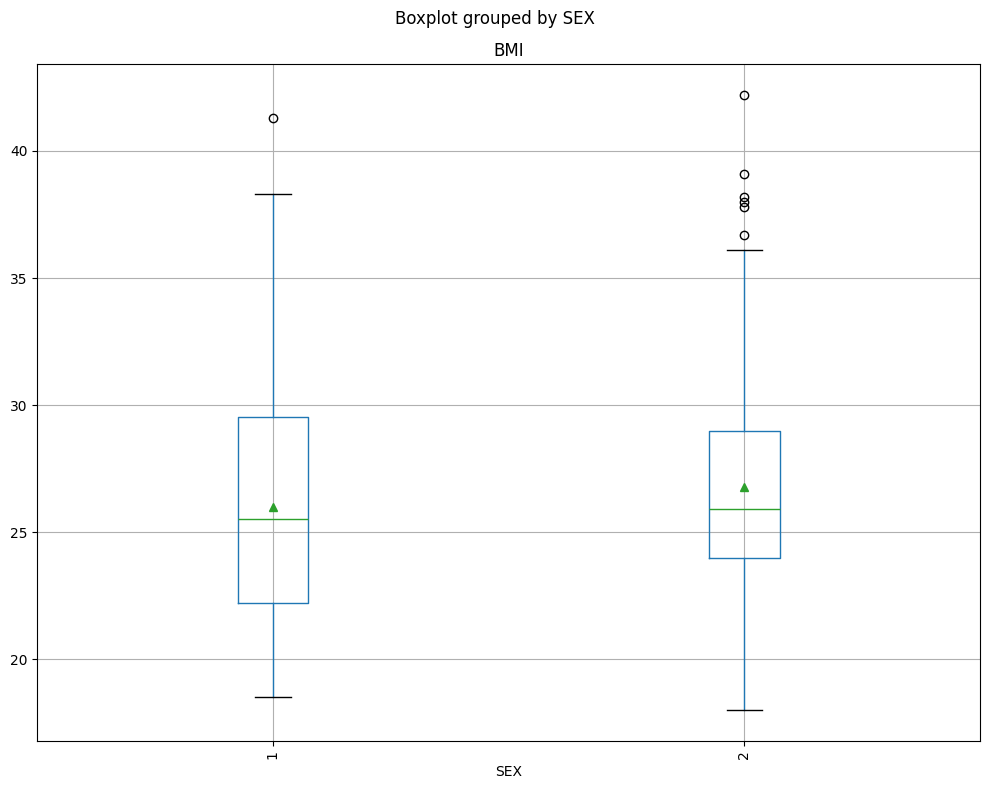

In [27]:
import matplotlib.pyplot as plt
df.boxplot(column='BMI', by='SEX', figsize=(10,8), showmeans=True)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Boxplot de BMI por sexo')

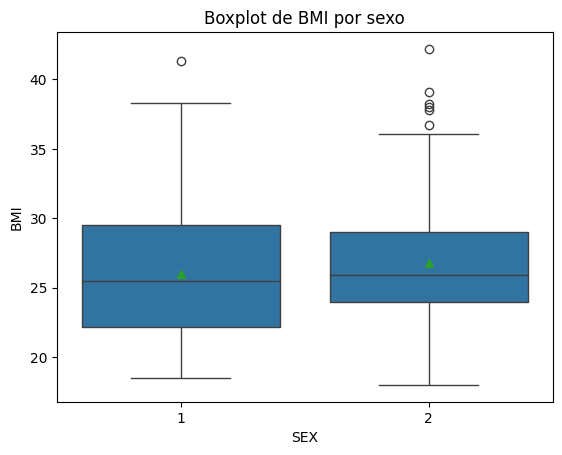

In [28]:
import seaborn as sns

sns.boxplot(x='SEX', y='BMI', data=df, showmeans=True)
plt.title("Boxplot de BMI por sexo")

In [29]:
columns = ['BMI','BP','Y']
for col in columns:
    print(f"Statistics for {col}:")
    print(df[col].groupby(df['SEX']).describe())

Statistics for BMI:
     count       mean       std   min   25%   50%    75%   max
SEX                                                           
1    235.0  26.010638  4.571242  18.5  22.2  25.5  29.55  41.3
2    207.0  26.790338  4.210251  18.0  24.0  25.9  29.00  42.2
Statistics for BP:
     count       mean        std   min   25%   50%    75%    max
SEX                                                             
1    235.0  91.521957  14.125498  62.0  82.0  88.0  101.0  133.0
2    207.0  98.194783  12.613532  70.0  89.0  97.0  109.0  126.0
Statistics for Y:
     count        mean        std   min   25%    50%    75%    max
SEX                                                               
1    235.0  149.021277  75.905781  25.0  85.5  140.0  200.0  346.0
2    207.0  155.666667  78.453313  39.0  88.0  141.0  220.5  341.0


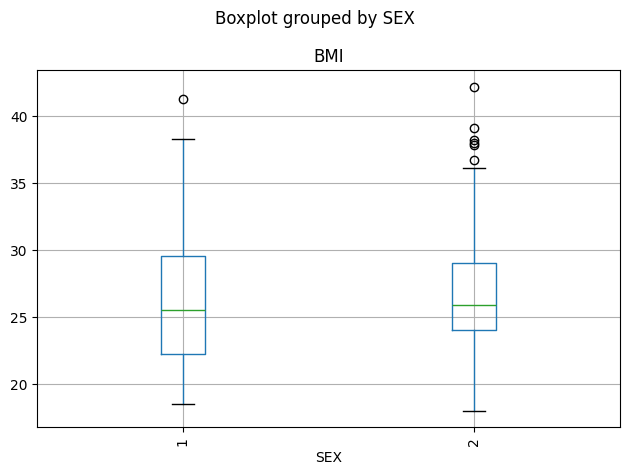

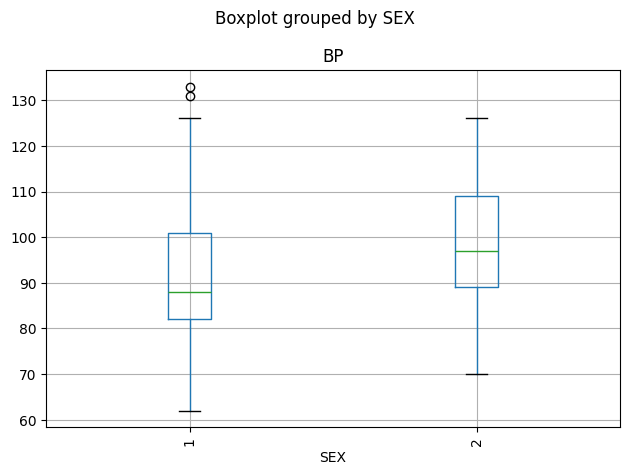

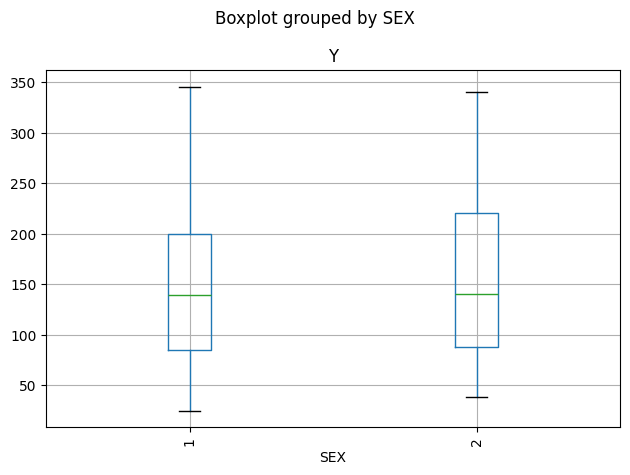

In [30]:
for col in columns:
    df.boxplot(column=col, by='SEX')
    plt.xticks(rotation='vertical')
    plt.tight_layout()
    plt.show()

### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

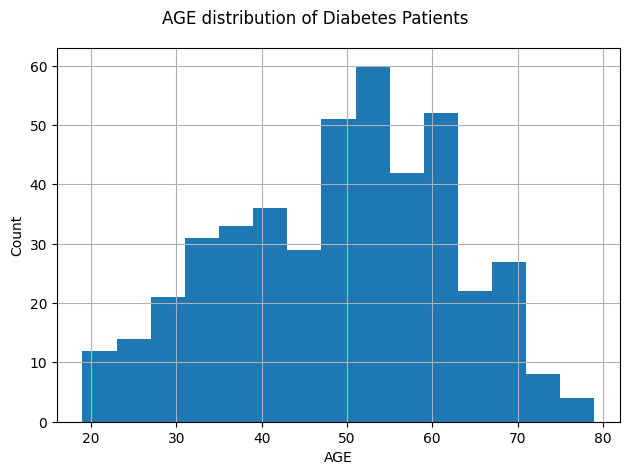

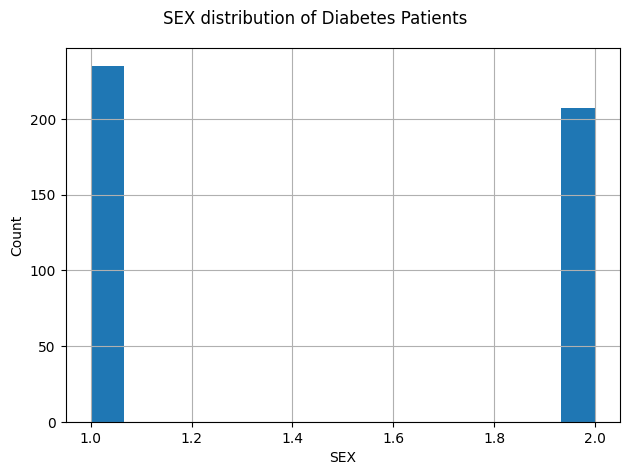

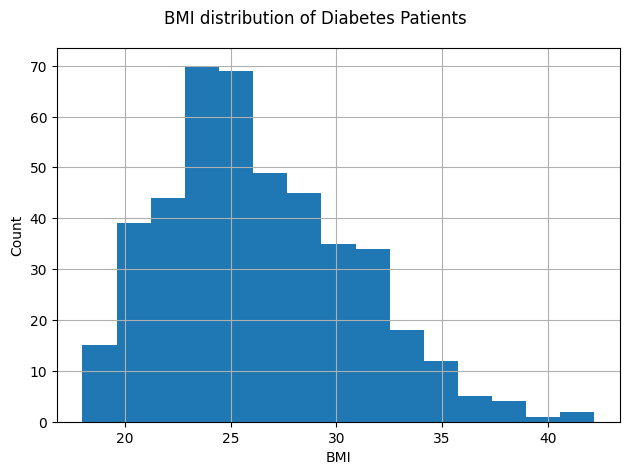

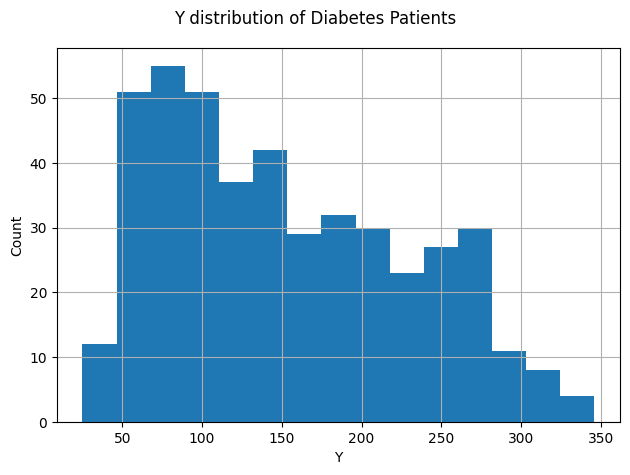

In [38]:
var = ['AGE','SEX','BMI','Y']
for col in var: 
    df[col].hist(bins=15)
    plt.suptitle(f'{col} distribution of Diabetes Patients')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

### Task 4: Test the correlation between different variables and disease progression (Y)

> **Hint** Correlation matrix would give you the most useful information on which values are dependent.

In [45]:
np.corrcoef(df['Y'],df['BMI'].fillna(method='pad'))

/tmp/ipykernel_2101/3941545322.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  np.corrcoef(df['Y'],df['BMI'].fillna(method='pad'))


array([[1.        , 0.58645013],
       [0.58645013, 1.        ]])

Covariance matrix:
[[5943.33134792  199.74859021]
 [ 199.74859021   19.51979812]]
Covariance = 199.74859020531292
Correlation = 0.5864501344746885


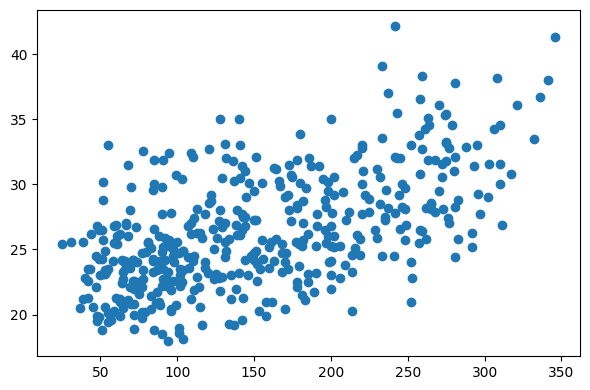

In [42]:
print(f"Covariance matrix:\n{np.cov(df['Y'], df['BMI'])}")
print(f"Covariance = {np.cov(df['Y'], df['BMI'])[0,1]}")
print(f"Correlation = {np.corrcoef(df['Y'], df['BMI'])[0,1]}")
plt.figure(figsize=(6,4))
plt.scatter(df['Y'],df['BMI'])
plt.tight_layout()
plt.show()

Covariance matrix:
[[5943.33134792  189.88306605]
 [ 189.88306605  171.84661044]]
Covariance = 189.8830660469316
Correlation = 0.1878887507189198


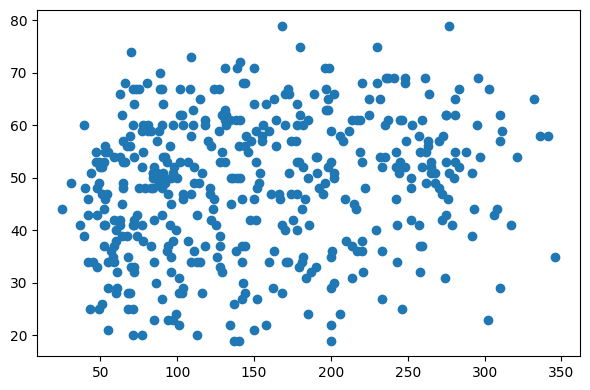

In [43]:
print(f"Covariance matrix:\n{np.cov(df['Y'], df['AGE'])}")
print(f"Covariance = {np.cov(df['Y'], df['AGE'])[0,1]}")
print(f"Correlation = {np.corrcoef(df['Y'], df['AGE'])[0,1]}")
plt.figure(figsize=(6,4))
plt.scatter(df['Y'],df['AGE'])
plt.tight_layout()
plt.show()

Covariance matrix:
[[5943.33134792  470.749878  ]
 [ 470.749878    191.30440104]]
Covariance = 470.74987800248323
Correlation = 0.4414817585625714


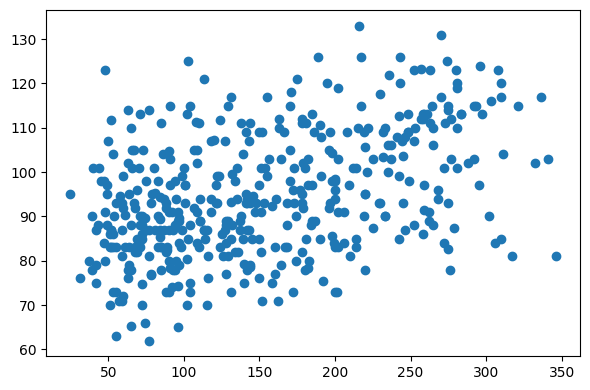

In [44]:
print(f"Covariance matrix:\n{np.cov(df['Y'], df['BP'])}")
print(f"Covariance = {np.cov(df['Y'], df['BP'])[0,1]}")
print(f"Correlation = {np.corrcoef(df['Y'], df['BP'])[0,1]}")
plt.figure(figsize=(6,4))
plt.scatter(df['Y'],df['BP'])
plt.tight_layout()
plt.show()

### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women

In [46]:
df.groupby('SEX').agg({ 'BMI' : 'mean', 'BP' : 'mean', 'Y' : 'mean', 'AGE' : 'count'}).rename(columns={ 'AGE' : 'COUNT'})

,BMI,BP,Y,COUNT
SEX,,,,
1,26.010638,91.521957,149.021277,235
2,26.790338,98.194783,155.666667,207


In [47]:
!pip install scipy
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Y'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 152.13 ± 5.29
p=0.90, mean = 152.13 ± 6.04
p=0.95, mean = 152.13 ± 7.21


/tmp/ipykernel_2101/1657523483.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  m, h = mean_confidence_interval(df['Y'].fillna(method='pad'),p)


In [48]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['SEX']==1,['Y']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['SEX']==2,['Y']],p)
    print(f'Conf={p:.2f}, Y for men: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, Y for women: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, Y for men: 141.87..156.17, Y for women: 147.79..163.55
Conf=0.90, Y for men: 140.84..157.20, Y for women: 146.66..164.68
Conf=0.95, Y for men: 139.27..158.78, Y for women: 144.92..166.42


Los intervalos si se traslapan por lo que la hipotesis de que la progresion del grado de diabetes entre hombres y mujeres es diferente es falsa

In [50]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['SEX']==2,['Y']], df.loc[df['SEX']==1,['Y']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 0.90
P-value: 0.367444979308397
